# Mohmad Hosein Ashoori - 97149068
## HW3

In [87]:
import pandas as pd
from sklearn import preprocessing, decomposition
import scipy.stats as stats 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline
matplotlib.style.use('fivethirtyeight')

UsageError: Line magic function `%` not found.


In [88]:
plt.style.use("dark_background")
for pdram in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[pdram] = '0.9'  # very light grey
for pdram in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[pdram] = '#1a1c23'  # bluish dark grey

# 1

In [89]:
social_network_ads = pd.read_csv('file/Social_Network_Ads.csv')
social_network_ads.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


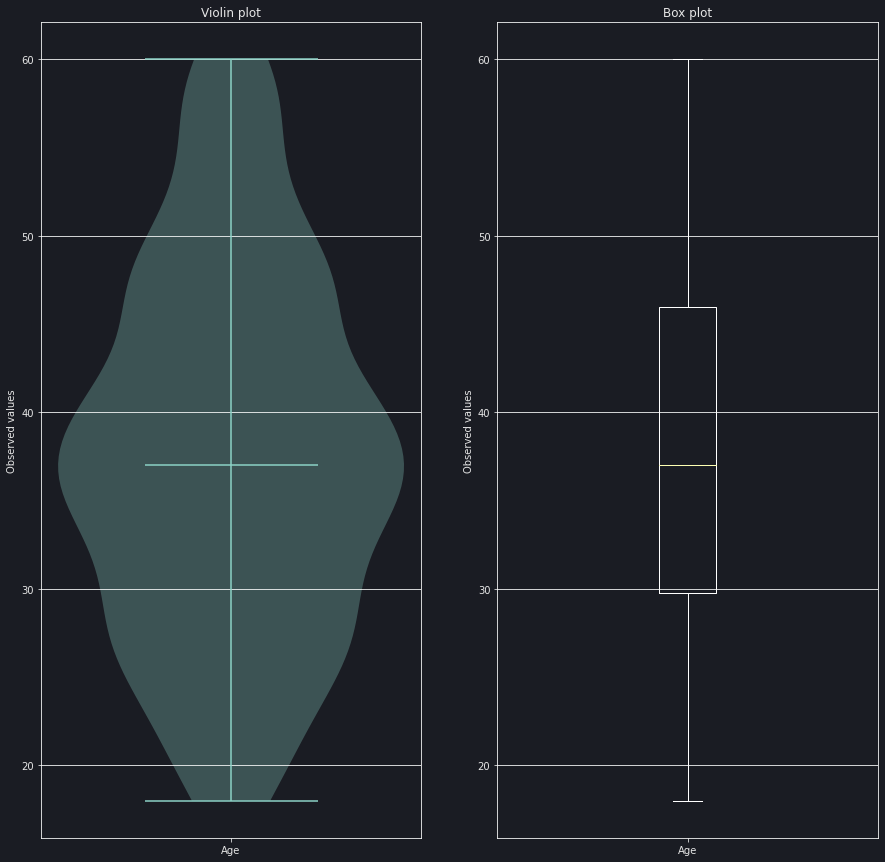

In [90]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
# all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]
all_data = social_network_ads[["Age"]]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(set(all_data).__len__())],
                  labels=list(set(all_data)))
    # ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

# Question 2

In [91]:
mall_customers = pd.read_csv('file/Mall_Customers.csv')
mall_customers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


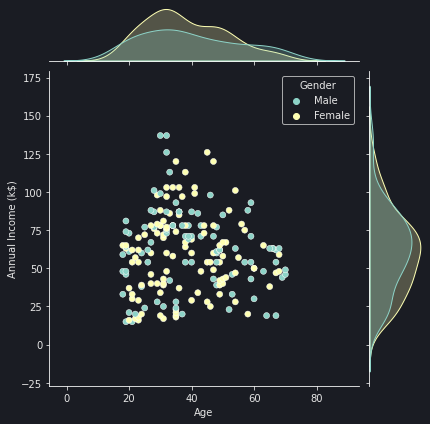

In [92]:
sns.jointplot(data=mall_customers, x="Age", y="Annual Income (k$)",hue='Gender')


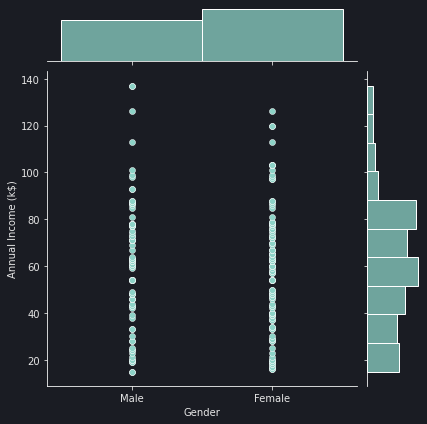

In [93]:
sns.jointplot(data=mall_customers, x="Gender", y="Annual Income (k$)")

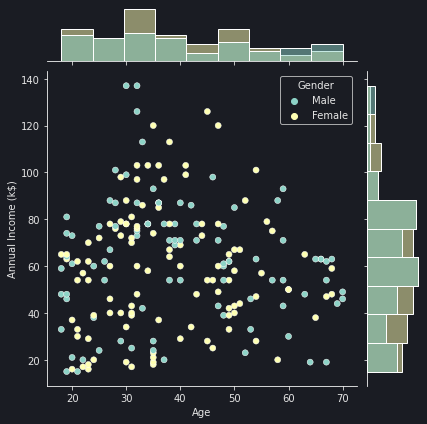

In [101]:
g = sns.JointGrid(data=mall_customers, x="Age", y="Annual Income (k$)",hue='Gender')
g.plot(sns.scatterplot, sns.histplot)

In [94]:
len_male = mall_customers.loc[mall_customers['Gender']=='Male']
len_female = mall_customers.loc[mall_customers['Gender']=='Female']
print(f'Female: {len(len_female)}\nMale: {len(len_male)}')

Female: 112
Male: 88


In [95]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], 
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'], 
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [96]:
from apriori_python import apriori
itemSetList = dataset
freqItemSet, rules = apriori(itemSetList, minSup=0.6, minConf=0.7)
print(freqItemSet)
rules
# [[{'beer'}, {'rice'}, 0.6666666666666666], [{'rice'}, {'beer'}, 1.0]]
# rules[0] --> rules[1], confidence = rules[2]

{1: {frozenset({'Yogurt'}), frozenset({'Eggs'}), frozenset({'Kidney Beans'}), frozenset({'Milk'}), frozenset({'Onion'})}, 2: {frozenset({'Onion', 'Eggs'}), frozenset({'Eggs', 'Kidney Beans'}), frozenset({'Yogurt', 'Kidney Beans'}), frozenset({'Milk', 'Kidney Beans'}), frozenset({'Onion', 'Kidney Beans'})}, 3: {frozenset({'Onion', 'Eggs', 'Kidney Beans'})}}


[[{'Eggs'}, {'Onion'}, 0.75],
 [{'Eggs'}, {'Kidney Beans', 'Onion'}, 0.75],
 [{'Eggs', 'Kidney Beans'}, {'Onion'}, 0.75],
 [{'Kidney Beans'}, {'Eggs'}, 0.8],
 [{'Onion'}, {'Eggs'}, 1.0],
 [{'Eggs'}, {'Kidney Beans'}, 1.0],
 [{'Yogurt'}, {'Kidney Beans'}, 1.0],
 [{'Milk'}, {'Kidney Beans'}, 1.0],
 [{'Onion'}, {'Kidney Beans'}, 1.0],
 [{'Onion'}, {'Eggs', 'Kidney Beans'}, 1.0],
 [{'Eggs', 'Onion'}, {'Kidney Beans'}, 1.0],
 [{'Kidney Beans', 'Onion'}, {'Eggs'}, 1.0]]